In [1]:
import pandas as pd
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


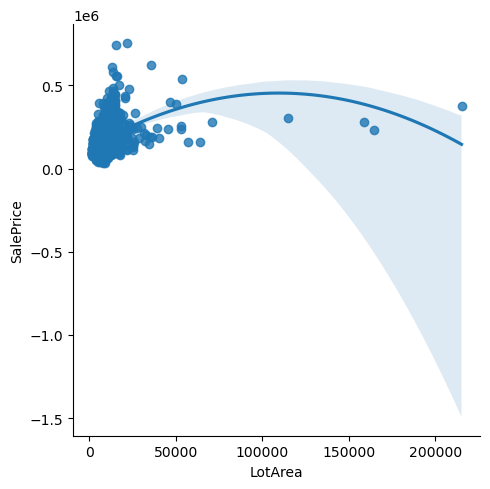

In [28]:
sns.lmplot(data=train, x="LotArea", y="SalePrice", order=2)

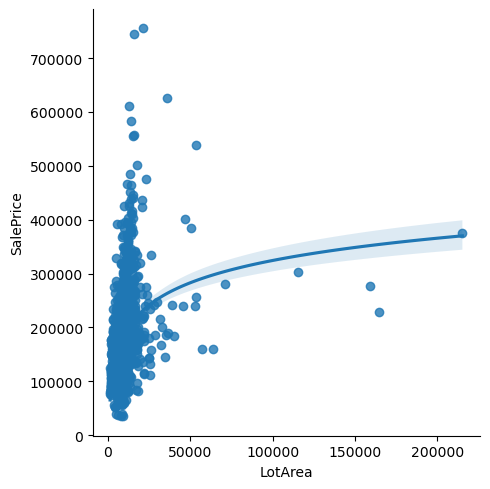

In [27]:
sns.lmplot(data=train, x="LotArea", y="SalePrice", logx=True)

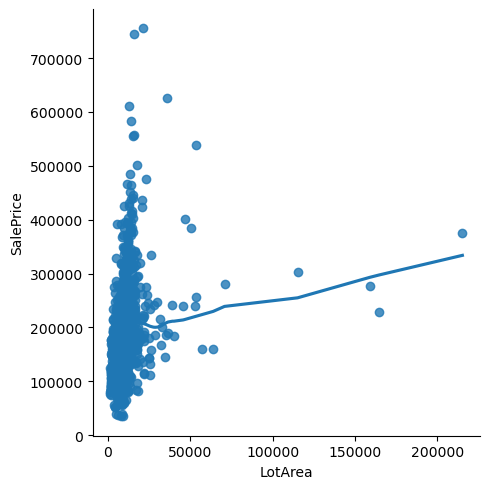

In [31]:
sns.lmplot(data=train, x="LotArea", y="SalePrice", lowess=True)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\robust\robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that

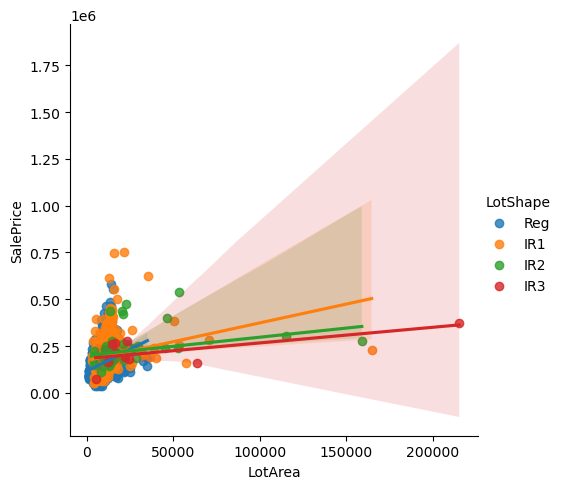

In [36]:
sns.lmplot(data=train, x="LotArea", y="SalePrice", hue="LotShape", robust=True)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

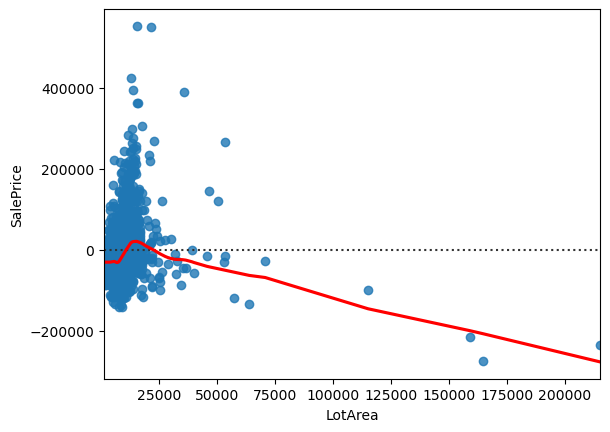

In [21]:
sns.residplot(data=train, x="LotArea", y="SalePrice", lowess=True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

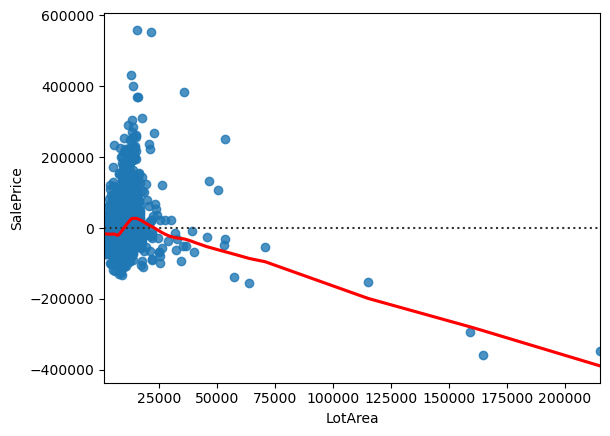

In [33]:
sns.residplot(data=train, x="LotArea", y="SalePrice", robust=True, lowess=True, line_kws=dict(color="r"))

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

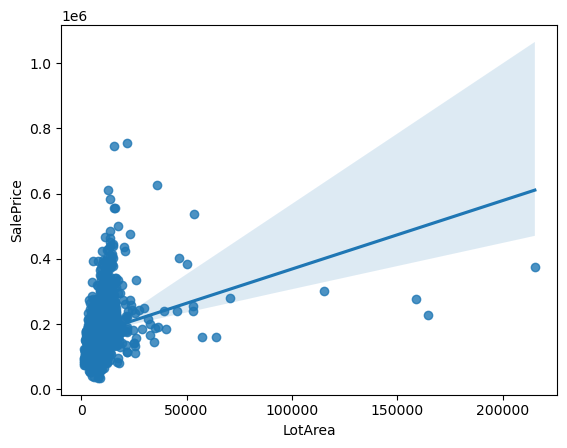

In [34]:
sns.regplot(data=train, x="LotArea", y="SalePrice")

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

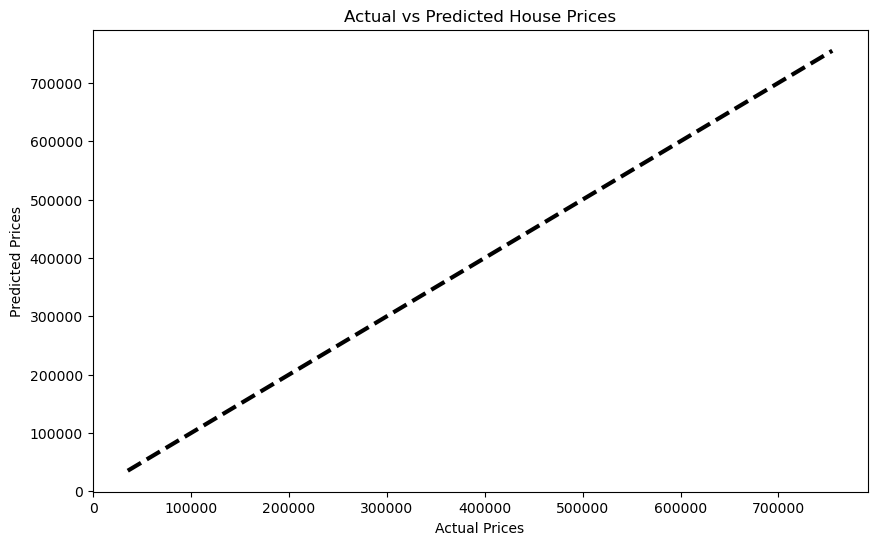

7189094014.825961

In [65]:
x_data = train[['LotArea']]
# x_data = train[["OverallQual"]]
y_data = train[["SalePrice"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# x_train = train[['LotArea']]

selected_model = LinearRegression()
selected_model.fit(x_train, y_train)

y_pred = selected_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.scatterplot(y_test, y_pred, color="rgb(255,0,0)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

mse